In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from string import ascii_letters
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('all_data.csv')

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (40,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(data)

191865

In [6]:
data['city_id'].isnull().any()

False

In [7]:
data['last_send_type'].isnull().any()

False

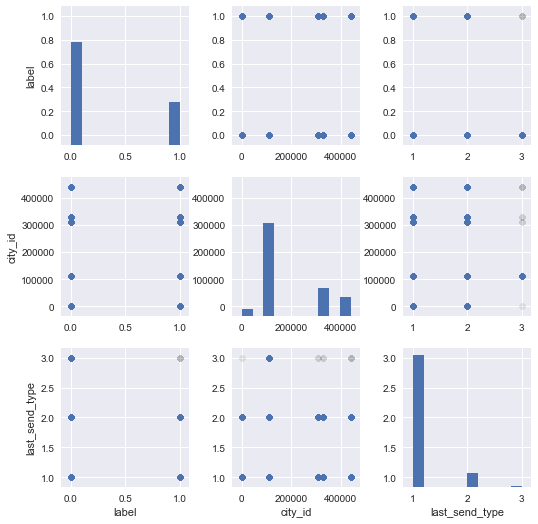

In [20]:
sns.set()
cols = ['label','city_id','last_send_type']
sns.pairplot(data[cols], size = 2.5, plot_kws=dict(alpha=0.003))
plt.show();

/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


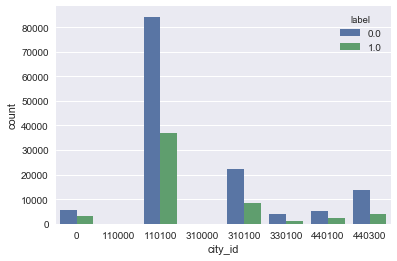

In [21]:
ax = sns.countplot(x="city_id", hue="label", data=data)
ax

In [30]:
for city in data['city_id'].unique():
    perc=len(data[(data['city_id']==city) & (data['label']==1)])/len(data[(data['city_id']==city)] )
    print('######')
    print(city)
    print(perc)

######
0
0.36861394935584185
######
110100
0.30563196995404157
######
110000
0.3333333333333333
######
310100
0.27786877348492145
######
440100
0.30906648757555405
######
440300
0.22774222521612214
######
330100
0.2291956305858987
######
310000
1.0


In [31]:
len(data[data['label']==1])/len(data)

0.2949834519062883

In [29]:
len(data[(data['city_id']==310000) ])

1

In [27]:
data['city_id'].unique()

array([     0, 110100, 110000, 310100, 440100, 440300, 330100, 310000])

In [34]:
for send in data['last_send_type'].unique():
    perc=len(data[(data['last_send_type']==send) & (data['label']==1)])/len(data[(data['last_send_type']==send)] )
    print('######')
    print(send)
    print(perc)
    print(len(data[(data['last_send_type']==send)] ))

######
1
0.30584616093649186
173584
######
2
0.19275086698735877
17878
######
3
0.1513647642679901
403


In [33]:
data['last_send_type'].unique()

array([1, 2, 3])

In [36]:
data2=pd.read_csv('data_cleaned_2.csv')

In [37]:
data2.head()

,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,total_orders,w1_total_orders,w2_total_orders,w3_total_orders,...,sex,age,login_platform_b,app_version_b,pca_1,pca_2,pca_3,pca_4,pca_5,label
0,0.663138,10,3.0,4.888889,1.0,12.0,16.0,4.0,2.0,2.0,...,1,80.0,0,1,-128653.255150,-186401.491722,-12622.457990,852.860985,200.624937,0.0
1,0.602960,18,7.0,2.941176,1.0,11.0,22.0,8.0,5.0,3.0,...,0,-1.0,1,1,-104047.073574,-185396.060384,46178.230062,-40501.194650,-3141.241625,0.0
2,0.391684,13,5.0,4.500000,2.0,12.0,13.0,3.0,2.0,2.0,...,0,-1.0,1,0,-122307.004921,-186072.180099,3095.386811,-4975.230657,392.257336,0.0
3,0.337142,9,5.0,8.625000,1.0,53.0,9.0,2.0,0.0,0.0,...,0,-1.0,1,1,-124827.572391,-186177.628090,-1953.514050,-3253.237032,23.748551,1.0
4,0.535490,12,5.0,3.454545,1.0,6.0,15.0,0.0,0.0,0.0,...,2,90.0,0,1,-130252.590024,-186407.399275,-13690.863239,2280.703953,196.324882,1.0


In [38]:
len(data2)

191855